In [ ]:
pip install pandas

In [ ]:
pip install plotly

In [ ]:
pip install matplotlib

In [46]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
df=pd.read_csv("Doublet_EAF_5Year.csv",sep=",")

In [48]:
 Doublet_EAF_5Year= df
Doublet_EAF_5Year.head()

,Time,Longitude,Latitude,Depth,Magnitude
0,06/02/2023 01:17:32,37.043,37.288,8.60,7.8
1,05/02/2023 04:16:52,36.044,37.411,7.08,2.0
2,04/02/2023 08:22:17,36.356,37.390,7.00,2.7
3,03/02/2023 22:43:10,38.814,38.274,6.57,2.5
4,03/02/2023 22:06:30,36.360,37.230,7.02,2.1


In [49]:
Doublet_EAF_5Year.shape

(4288, 5)

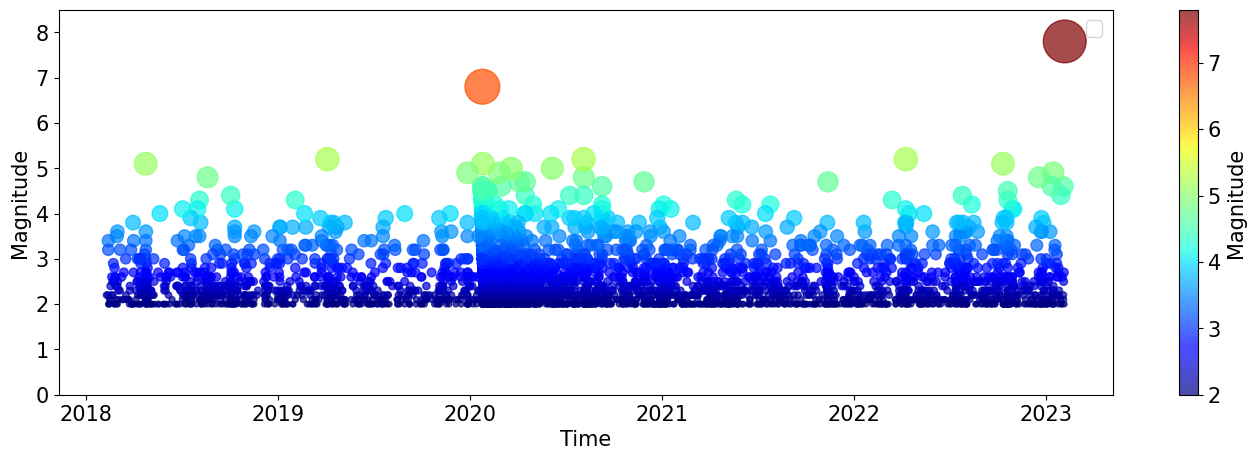

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a DataFrame with example data
data = pd.DataFrame({
    'Date': Doublet_EAF_5Year.iloc[:, 0].values,
    'Magnitude': Doublet_EAF_5Year.iloc[:, 4].values
})

# Converting the Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y %H:%M:%S')

# Plotting
plt.figure(figsize=(17, 5))
scatter = plt.scatter(
    data['Date'], data['Magnitude'],
    c=data['Magnitude'], cmap='jet',
    s=data['Magnitude']**3* 2,  # Scaling the size based on magnitude
    alpha=0.7)

plt.colorbar(scatter, label='Magnitude')  # Adding color bar
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.legend()
plt.rc('font', size=15)
plt.ylim(0, 8.5)

plt.show()


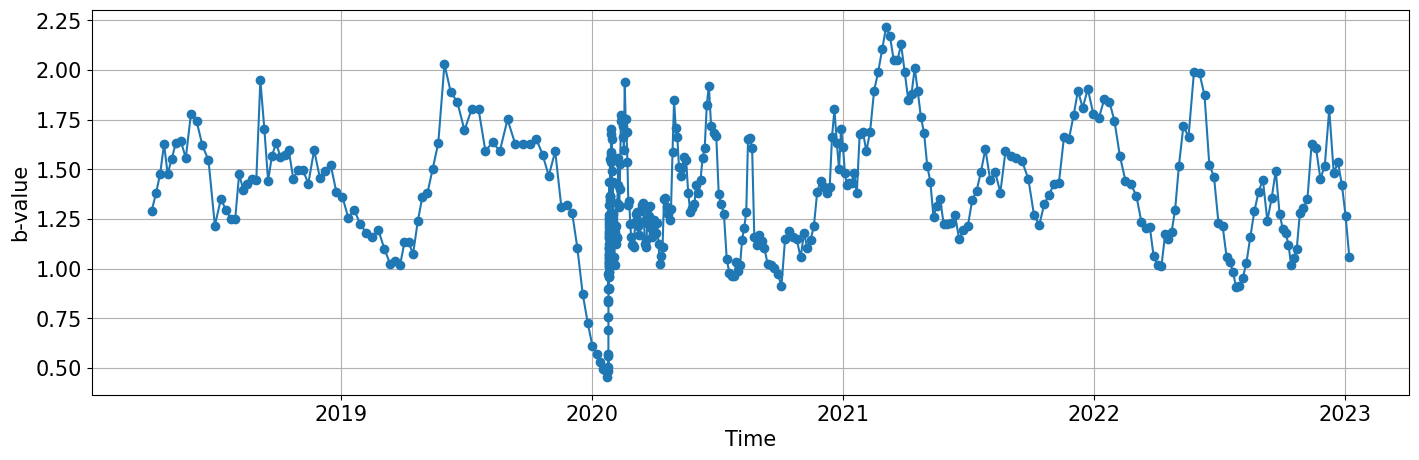

In [ ]:

data = pd.DataFrame({
    'Time': Doublet_EAF_5Year.iloc[:, 0].values,
    'Magnitude': Doublet_EAF_5Year.iloc[:, 4].values
})

# Convert time to datetime with day-first format
data["Time"] = pd.to_datetime(data["Time"], dayfirst=True)
data["time_numeric"] = data["Time"].apply(lambda x: x.timestamp())

# Calculate b-values over time
time_centers, b_values = b_value_time_distribution(
    data["time_numeric"].values,
    data["Magnitude"].values
)

# Plot the results
plt.figure(figsize=(17, 5))
plt.plot(pd.to_datetime(time_centers, unit='s'), b_values, marker='o', linestyle='-')
plt.xlabel("Time")
plt.ylabel("b-value")
plt.grid()
plt.show()


In [ ]:
import math
import numpy as np

def calculate_earthquake_energy(magnitude):
    """
    Deprem büyüklüğüne (Mw) göre enerjiyi hesaplar.
    Enerji, erg biriminden Joule'a çevrilir.
    """
    # Deprem enerjisi erg cinsinden
    energy_erg = 10 ** (1.5 * magnitude + 4.8)
    # Joule cinsine çevirme
    energy_joule = energy_erg / 10**7
    return energy_joule

# Örnek büyüklükler
magnitudes = df[['Magnitude']].values  # Bu bir 2D NumPy array olabilir

print("Deprem büyüklüğü ve enerji (Joule):")
for mw in magnitudes:
    magnitude = mw[0]  # 2D array olduğu için ilk elemanı al
    energy = calculate_earthquake_energy(magnitude)
    print(f"Mw: {magnitude} --> Enerji: {energy:.2e} Joule")


Deprem büyüklüğü ve enerji (Joule):
Mw: 7.8 --> Enerji: 3.16e+09 Joule
Mw: 2.0 --> Enerji: 6.31e+00 Joule
Mw: 2.7 --> Enerji: 7.08e+01 Joule
Mw: 2.5 --> Enerji: 3.55e+01 Joule
Mw: 2.1 --> Enerji: 8.91e+00 Joule
Mw: 2.2 --> Enerji: 1.26e+01 Joule
Mw: 4.6 --> Enerji: 5.01e+04 Joule
Mw: 2.6 --> Enerji: 5.01e+01 Joule
Mw: 2.0 --> Enerji: 6.31e+00 Joule
Mw: 2.0 --> Enerji: 6.31e+00 Joule
Mw: 4.4 --> Enerji: 2.51e+04 Joule
Mw: 2.1 --> Enerji: 8.91e+00 Joule
Mw: 2.3 --> Enerji: 1.78e+01 Joule
Mw: 2.2 --> Enerji: 1.26e+01 Joule
Mw: 2.2 --> Enerji: 1.26e+01 Joule
Mw: 2.7 --> Enerji: 7.08e+01 Joule
Mw: 2.6 --> Enerji: 5.01e+01 Joule
Mw: 2.0 --> Enerji: 6.31e+00 Joule
Mw: 2.8 --> Enerji: 1.00e+02 Joule
Mw: 3.1 --> Enerji: 2.82e+02 Joule
Mw: 2.9 --> Enerji: 1.41e+02 Joule
Mw: 2.6 --> Enerji: 5.01e+01 Joule
Mw: 2.1 --> Enerji: 8.91e+00 Joule
Mw: 2.2 --> Enerji: 1.26e+01 Joule
Mw: 2.8 --> Enerji: 1.00e+02 Joule
Mw: 3.3 --> Enerji: 5.62e+02 Joule
Mw: 3.2 --> Enerji: 3.98e+02 Joule
Mw: 2.0 --> Enerji:

In [ ]:
import math

def calculate_earthquake_energy(magnitude):
    """
    Deprem büyüklüğüne (Mw) göre enerjiyi hesaplar.
    Enerji, erg biriminden Joule'a çevrilir.
    """
    energy_erg = 10 ** (1.5 * magnitude + 4.8)
    energy_joule = energy_erg / 10**7
    return energy_joule

# Örnek büyüklükler
magnitudes = df[['Magnitude']].values  # NumPy array

# Enerji değerlerini hesapla ve listeye ekle
energies = [calculate_earthquake_energy(mw[0]) for mw in magnitudes]

# Sonuç
print(energies)


[3162277660.1683793, 6.30957344480193, 70.79457843841402, 35.481338923357605, 8.91250938133746, 12.58925411794166, 50118.72336272715, 50.118723362727145, 6.30957344480193, 6.30957344480193, 25118.864315095823, 8.91250938133746, 17.78279410038923, 12.58925411794166, 12.58925411794166, 70.79457843841402, 50.118723362727145, 6.30957344480193, 100.0, 281.8382931264449, 141.25375446227497, 50.118723362727145, 8.91250938133746, 12.58925411794166, 100.0, 562.3413251903492, 398.1071705534986, 6.30957344480193, 17.78279410038923, 12.58925411794166, 25.11886431509572, 6.30957344480193, 6.30957344480193, 17.78279410038923, 141253.75446227554, 6.30957344480193, 12.58925411794166, 8.91250938133746, 12.58925411794166, 12.58925411794166, 50118.72336272715, 6.30957344480193, 50.118723362727145, 8.91250938133746, 141.25375446227497, 1584.8931924611109, 12.58925411794166, 8.91250938133746, 50.118723362727145, 8.91250938133746, 35.481338923357605, 6.30957344480193, 8.91250938133746, 25.11886431509572, 17

In [ ]:
energies

[3162277660.1683793,
 6.30957344480193,
 70.79457843841402,
 35.481338923357605,
 8.91250938133746,
 12.58925411794166,
 50118.72336272715,
 50.118723362727145,
 6.30957344480193,
 6.30957344480193,
 25118.864315095823,
 8.91250938133746,
 17.78279410038923,
 12.58925411794166,
 12.58925411794166,
 70.79457843841402,
 50.118723362727145,
 6.30957344480193,
 100.0,
 281.8382931264449,
 141.25375446227497,
 50.118723362727145,
 8.91250938133746,
 12.58925411794166,
 100.0,
 562.3413251903492,
 398.1071705534986,
 6.30957344480193,
 17.78279410038923,
 12.58925411794166,
 25.11886431509572,
 6.30957344480193,
 6.30957344480193,
 17.78279410038923,
 141253.75446227554,
 6.30957344480193,
 12.58925411794166,
 8.91250938133746,
 12.58925411794166,
 12.58925411794166,
 50118.72336272715,
 6.30957344480193,
 50.118723362727145,
 8.91250938133746,
 141.25375446227497,
 1584.8931924611109,
 12.58925411794166,
 8.91250938133746,
 50.118723362727145,
 8.91250938133746,
 35.481338923357605,
 6.3095

In [ ]:
df['Energy (Joule)'] = energies


In [ ]:
oublet_EAF_5Year= df
Doublet_EAF_5Year.head()

,Time,Longitude,Latitude,Depth,Magnitude,Energy (Joule)
0,06/02/2023 01:17:32,37.043,37.288,8.60,7.8,3.162278e+09
1,05/02/2023 04:16:52,36.044,37.411,7.08,2.0,6.309573e+00
2,04/02/2023 08:22:17,36.356,37.390,7.00,2.7,7.079458e+01
3,03/02/2023 22:43:10,38.814,38.274,6.57,2.5,3.548134e+01
4,03/02/2023 22:06:30,36.360,37.230,7.02,2.1,8.912509e+00


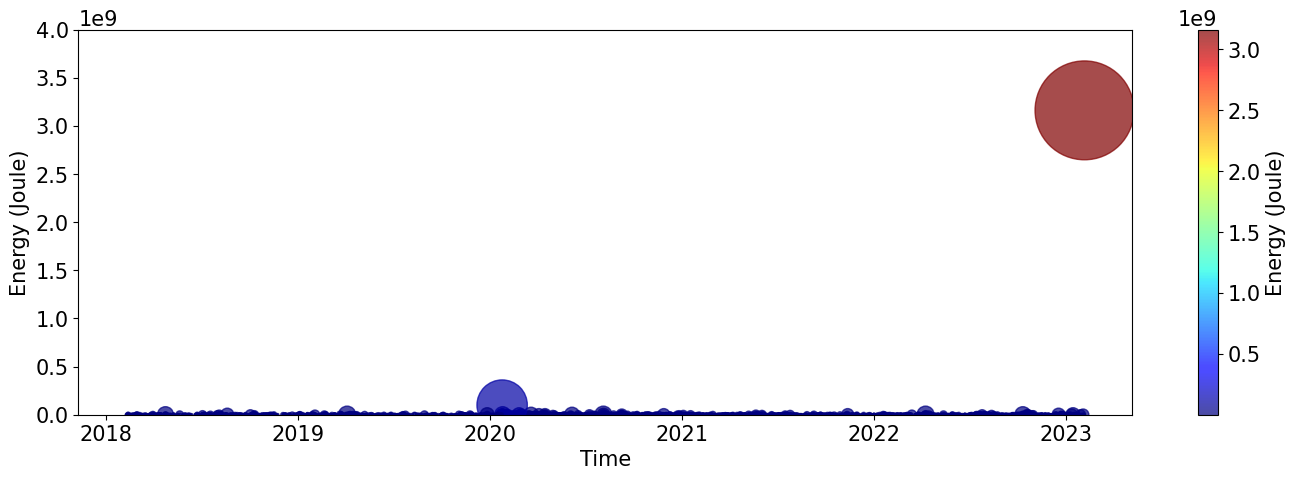

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure Doublet_EAF_5Year is defined before this step
data = pd.DataFrame({
    'Time': Doublet_EAF_5Year.iloc[:, 0].values,
    'Energy (Joule)': Doublet_EAF_5Year.iloc[:, 5].values
})

# Converting the Time column to datetime format
data['Time'] = pd.to_datetime(data['Time'], format='%d/%m/%Y %H:%M:%S')

# Plotting
plt.rc('font', size=15)  # Setting the font size globally
plt.figure(figsize=(17, 5))

scatter = plt.scatter(
    data['Time'], data['Energy (Joule)'],
    c=data['Energy (Joule)'], cmap='jet',
    s=data['Energy (Joule)']** 0.39,  # Adjust the size scaling as needed
    alpha=0.7
)

plt.colorbar(scatter, label='Energy (Joule)')  # Adding color bar
plt.xlabel('Time')
plt.ylabel('Energy (Joule)')
plt.ylim(0, 4e9)
plt.show()


In [ ]:
x = Doublet_EAF_5Year.iloc[:,1].values
y = Doublet_EAF_5Year.iloc[:,2].values
z = Doublet_EAF_5Year.iloc[:,3].values
colors = Doublet_EAF_5Year.iloc[:,4].values
sizes = Doublet_EAF_5Year.iloc[:,4].values*15

In [ ]:
import plotly.graph_objects as go

# Obtain high-resolution world map data online
fig = go.Figure(go.Choroplethmapbox(
    geojson="https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json",
    locations=["USA", "CAN", "MEX", "RUS", "CHN"],  # Example country codes (USA, Canada, Mexico, Russia, China)
    z=[1, 1, 1, 1, 1],  # Values to be assigned to countries (all set to 1)
    colorscale='Jet',  # Color scale name (Viridis, YlGnBu, Jet, etc.)
    zmin=2,
    zmax=7,
    marker_opacity=0.9,  # Opacity of country borders
    marker_line_width=1,  # Thickness of country borders
))

# Create sample earthquake data
earthquake_data = {
    'Longitude': x,
    'Latitude': y,
    'Magnitude': colors,
}

# Add earthquake data with Scatter plot
fig.add_trace(go.Scattermapbox(
    lat=earthquake_data['Latitude'],
    lon=earthquake_data['Longitude'],
    mode='markers',
    marker=dict(
        size=earthquake_data['Magnitude'] * 3,  # Set point sizes based on Magnitude value
        color=earthquake_data['Magnitude'],  # Set color scale based on Magnitude value
        colorscale='Jet',  # Color scale name (Viridis, YlGnBu, Jet, etc.)
    ),
))

# Specify map layout and style
fig.update_layout(
    mapbox_style="open-street-map",  # Set map style (for other styles: "open-street-map", "stamen-terrain", etc.)
    mapbox_zoom=6,  # Set map zoom level
    mapbox_center={"lat": 37.000, "lon": 37.0000},  # Set map center (center of the USA)
)

# Increase resolution and font size
fig.update_layout(
    width=700,  # Set width to increase resolution
    height=610,  # Set height to increase resolution
    font=dict(
        size=25  # Set font size for English comments
    )
)

# Display the plot
fig.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display



# İnteraktif işlev

def plot_3d_scatter(elev, azim, zoom, theta):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x, y, z, c=colors, s=sizes, cmap='jet')
    cbar = plt.colorbar(ax.scatter(x, y, z, c=colors, s=sizes, cmap='jet'))
    cbar.set_label('Magnitude')

    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_zlabel('Depth_km')
    ax.dist = zoom  # Zoom ayarı
    ax.azim = theta  # Maus ile çevirme
    plt.show()

# İnteraktif widget'ı oluşturma
elev_slider = widgets.IntSlider(min=0, max=180, value=30, description='Elevation:')
azim_slider = widgets.IntSlider(min=0, max=360, value=30, description='Azimuth:')
zoom_slider = widgets.FloatSlider(min=1, max=10, value=5, description='Zoom:')
theta_slider = widgets.IntSlider(min=0, max=360, value=30, description='Theta:')
interactive_plot = interactive(plot_3d_scatter, elev=elev_slider, azim=azim_slider, zoom=zoom_slider, theta=theta_slider)

# Widget'ı görüntüleme
display(interactive_plot)

interactive(children=(IntSlider(value=30, description='Elevation:', max=180), IntSlider(value=30, description=…

In [ ]:
x = Doublet_EAF_5Year.iloc[:,1].values
y = Doublet_EAF_5Year.iloc[:,2].values
z = Doublet_EAF_5Year.iloc[:,0].values
colors = Doublet_EAF_5Year.iloc[:,4].values
sizes = Doublet_EAF_5Year.iloc[:,4].values*8

In [ ]:
from datetime import datetime

# Zaman damgalarını içeren bir liste oluştur
timestamps = z

# Zaman damgalarını saniyeye dönüştür
seconds = [datetime.timestamp(datetime.strptime(timestamp, '%d/%m/%Y %H:%M:%S')) for timestamp in timestamps]

print(seconds) # Saniye cinsinden zaman damgalarını görüntüle


[1675646252.0, 1675570612.0, 1675498937.0, 1675464190.0, 1675461990.0, 1675424232.0, 1675422308.0, 1675234924.0, 1675135498.0, 1675055805.0, 1675008759.0, 1674961326.0, 1674722687.0, 1674689936.0, 1674633985.0, 1674626771.0, 1674624083.0, 1674608256.0, 1674596444.0, 1674354519.0, 1674334032.0, 1674298307.0, 1674268014.0, 1674255839.0, 1674169468.0, 1674048647.0, 1673979760.0, 1673928750.0, 1673829993.0, 1673762365.0, 1673757157.0, 1673756944.0, 1673755647.0, 1673753977.0, 1673753786.0, 1673650964.0, 1673642648.0, 1673639284.0, 1673634584.0, 1673594162.0, 1673556049.0, 1673440893.0, 1673277939.0, 1673270874.0, 1673265220.0, 1673243862.0, 1673226717.0, 1673132307.0, 1673124462.0, 1672968063.0, 1672926515.0, 1672904588.0, 1672904463.0, 1672838452.0, 1672825905.0, 1672685999.0, 1672655883.0, 1672634282.0, 1672624304.0, 1672608316.0, 1672598912.0, 1672474502.0, 1672286415.0, 1672253783.0, 1672215680.0, 1672212662.0, 1672170900.0, 1672167984.0, 1672164906.0, 1672164573.0, 1672126292.0, 16720

In [ ]:
seconds

[1675646252.0,
 1675570612.0,
 1675498937.0,
 1675464190.0,
 1675461990.0,
 1675424232.0,
 1675422308.0,
 1675234924.0,
 1675135498.0,
 1675055805.0,
 1675008759.0,
 1674961326.0,
 1674722687.0,
 1674689936.0,
 1674633985.0,
 1674626771.0,
 1674624083.0,
 1674608256.0,
 1674596444.0,
 1674354519.0,
 1674334032.0,
 1674298307.0,
 1674268014.0,
 1674255839.0,
 1674169468.0,
 1674048647.0,
 1673979760.0,
 1673928750.0,
 1673829993.0,
 1673762365.0,
 1673757157.0,
 1673756944.0,
 1673755647.0,
 1673753977.0,
 1673753786.0,
 1673650964.0,
 1673642648.0,
 1673639284.0,
 1673634584.0,
 1673594162.0,
 1673556049.0,
 1673440893.0,
 1673277939.0,
 1673270874.0,
 1673265220.0,
 1673243862.0,
 1673226717.0,
 1673132307.0,
 1673124462.0,
 1672968063.0,
 1672926515.0,
 1672904588.0,
 1672904463.0,
 1672838452.0,
 1672825905.0,
 1672685999.0,
 1672655883.0,
 1672634282.0,
 1672624304.0,
 1672608316.0,
 1672598912.0,
 1672474502.0,
 1672286415.0,
 1672253783.0,
 1672215680.0,
 1672212662.0,
 167217090

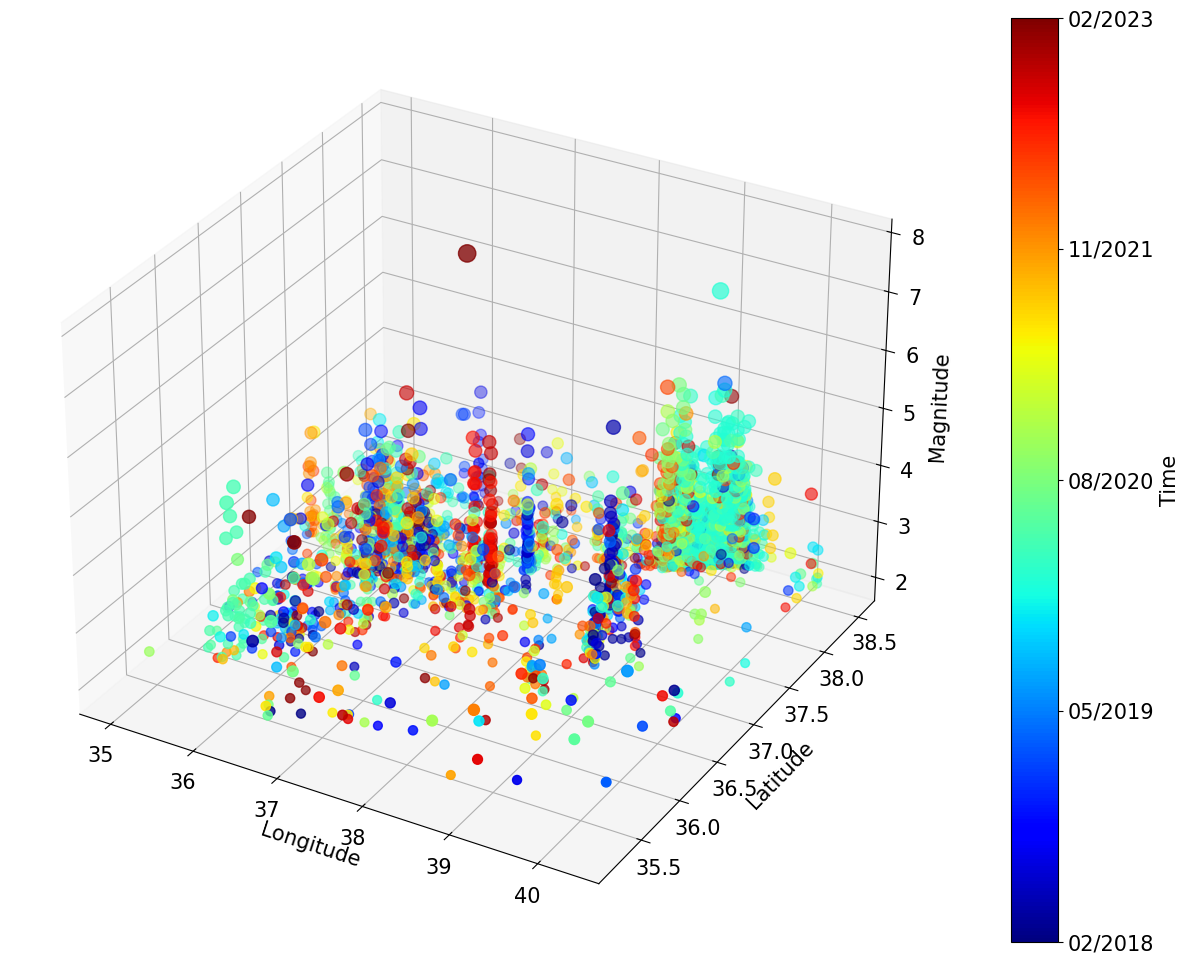

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from datetime import datetime

# Ensure 'Doublet_EAF_5Year' is a valid DataFrame
# Convert the time data into seconds since epoch if needed
# Example: seconds = Doublet_EAF_5Year['time_column'].apply(lambda t: datetime.timestamp(t))

x = Doublet_EAF_5Year.iloc[:, 1].values  # Longitude
y = Doublet_EAF_5Year.iloc[:, 2].values  # Latitude
z = Doublet_EAF_5Year.iloc[:, 4].values  # Magnitude

# Define colors based on time, assuming 'seconds' is a time-based array in seconds
colors = seconds  # Ensure seconds is defined
sizes = Doublet_EAF_5Year.iloc[:, 4].values *20  # Adjust size for better visibility

fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(x, y, z, c=colors, s=sizes, cmap='jet')

# Colorbar for time representation
cbar = plt.colorbar(scatter)
cbar.set_label('Time')

# Labeling axes
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Magnitude')

# Formatting colorbar time ticks
time_ticks = np.linspace(min(seconds), max(seconds), 5)
time_labels = [datetime.fromtimestamp(t).strftime('%m/%Y') for t in time_ticks]
cbar.set_ticks(time_ticks)
cbar.set_ticklabels(time_labels)

# Adjust font size
plt.rc('font', size=12)

plt.show()
